The best sollution to overfitting is having more training data, then we can use techniques like regularization.

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.10.0


In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

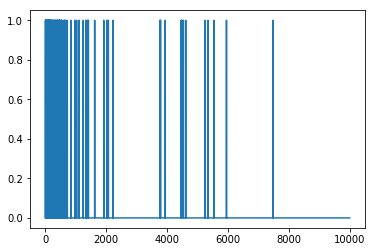

In [4]:
plt.plot(train_data[0])


In [5]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [6]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.4573 - acc: 0.8288 - binary_crossentropy: 0.4573 - val_loss: 0.3214 - val_acc: 0.8806 - val_binary_crossentropy: 0.3214
Epoch 2/20
 - 3s - loss: 0.2372 - acc: 0.9154 - binary_crossentropy: 0.2372 - val_loss: 0.2843 - val_acc: 0.8868 - val_binary_crossentropy: 0.2843
Epoch 3/20
 - 3s - loss: 0.1775 - acc: 0.9389 - binary_crossentropy: 0.1775 - val_loss: 0.2905 - val_acc: 0.8844 - val_binary_crossentropy: 0.2905
Epoch 4/20
 - 3s - loss: 0.1422 - acc: 0.9520 - binary_crossentropy: 0.1422 - val_loss: 0.3175 - val_acc: 0.8786 - val_binary_crossentropy: 0.3175
Epoch 5/20
 - 3s - loss: 0.1178 - acc: 0.9616 - binary_crossentropy: 0.1178 - val_loss: 0.3431 - val_acc: 0.8744 - val_binary_crossentropy: 0.3431
Epoch 6/20
 - 3s - loss: 0.0971 - acc: 0.9708 - binary_crossentropy: 0.0971 - val_loss: 0.3738 - val_acc: 0.8694 - val_binary_crossentropy: 0.3738
Epoch 7/20
 - 3s - loss: 0.0804 - acc: 0.9774 - binary_crossentropy: